# Relatório Exercício Programa (EP) 2
## MAC 219: Programação Paralela e Concorrente

### Participantes:

| Nome | Nusp|
|----|:---:|
| Débora D'Angelo Reina de Araujo | 11221668 |
| Eike Souza da Silva | 4618653 |
| Julia Leite | 11221797 |
| Lara Ayumi Nagamatsu | 9910568 |

In [1]:
# Libs:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st


In [2]:
from google.colab import files
uploaded = files.upload()

Saving MPI_OMP-Triple_Spiral_Valley-4096.csv to MPI_OMP-Triple_Spiral_Valley-4096.csv
Saving MPI_PTH-Triple_Spiral_Valley-4096.csv to MPI_PTH-Triple_Spiral_Valley-4096.csv
Saving MPI-Triple_Spiral_Valley-4096.csv to MPI-Triple_Spiral_Valley-4096.csv
Saving OpenMP-Triple_Spiral_Valley-4096.csv to OpenMP-Triple_Spiral_Valley-4096.csv
Saving Pthreads-Triple_Spiral_Valley-4096.csv to Pthreads-Triple_Spiral_Valley-4096.csv
Saving Sequential-Triple_Spiral_Valley-4096.csv to Sequential-Triple_Spiral_Valley-4096.csv


## Células Auxiliares

In [3]:
def mean(arr):
  if (isinstance(arr[0], list) and not isinstance(arr[0][0], list)):
    s = 0
    cnt = 0
    for i in range(len(arr)):
      s = s + sum(arr[i])
      cnt = cnt + len(arr[i])
    return (s / cnt)
  elif (isinstance(arr, list)):
    return sum(arr)/len(arr)
  else:
    print("ERRO. Tipo nao previsto")

### Obtemos os dados dos arquivos.csv

In [4]:
# Exemplo com o OMPI + OMP

# leio o arquivo
aux = pd.read_csv('MPI_OMP-Triple_Spiral_Valley-4096.csv')

# processos e threads testados
processos = [2, 4, 8, 16]
threads = [1, 2, 4, 8, 16, 32]

# crio um dicionario para os programas
# data[<tipo do programa>][<numero de processos>][<numero de threads>] = <lista 
#     dos 15 tempos de execução analisados>

data = {}

data['mpi_omp'] = {}

for p in processos:
  data['mpi_omp'][p] = {}
  for t in threads:
    tmp = aux[(aux.n_process == p) & (aux.n_threads == t)]
    tmp = tmp['time']
    data['mpi_omp'][p][t] = list(tmp.values)
  

In [5]:
# capturar outros dados

# MPI

# leio o arquivo
aux = pd.read_csv('MPI-Triple_Spiral_Valley-4096.csv')

data['mpi'] = {}

for p in processos:
  data['mpi'][p] = {}
  tmp = aux[aux.n_process == p]
  tmp = tmp['time']
  data['mpi'][p] = list(tmp.values)

#print(data['mpi'][16])

In [6]:
# Pthreads + MPI
# leio o arquivo
aux = pd.read_csv('MPI_PTH-Triple_Spiral_Valley-4096.csv')

data['mpi_pth'] = {}

for p in processos:
  data['mpi_pth'][p] = {}
  for t in threads:
    tmp = aux[(aux.n_process == p) & (aux.n_threads == t)]
    tmp = tmp['time']
    data['mpi_pth'][p][t] = list(tmp.values)

#print(data['mpi_pth'][16][32])

In [7]:
# OpenMP

# leio o arquivo
aux = pd.read_csv('OpenMP-Triple_Spiral_Valley-4096.csv')

data['omp'] = {}

for t in threads:
  tmp = aux[(aux.n_threads == t)]
  tmp = tmp['time']
  data['omp'][t] = list(tmp.values)

#print(data['omp'][32])

In [8]:
# Pthreads

# leio o arquivo
aux = pd.read_csv('Pthreads-Triple_Spiral_Valley-4096.csv')

data['pth'] = {}

for t in threads:
  tmp = aux[(aux.n_threads == t)]
  tmp = tmp['time']
  data['pth'][t] = list(tmp.values)

#print(data['pth'][32])

In [9]:
# Sequential

# leio o arquivo
aux = pd.read_csv('Sequential-Triple_Spiral_Valley-4096.csv')

tmp = aux['time']

data['seq'] = {}
data['seq'][1] = list(tmp.values)

#print(data['seq'][1])

# Determinação dos melhores parâmetros:

Para determinamos o parâmetros que resultavam em maior ganho de performance para cada implementação, fixamos:

### Parâmetros utilizados:

- **Repetições**: 15
- **Tamanho da imagem**: 4096
- **Região**: Triple Spiral Valley

### Implementações:
  - Sequencial
  - Pthreads
  - OMP
  - OMPI
  - OMPI + Pthreads
  - OMPI + OMP

### Número de processos e threads:
  - Processos: 2, 4, 8, 16
  - Threads:   1, 2, 4, 8, 16, 32


### Observações:

A **linha em vermelho**, chamada de **controle**, representa a **média** da execução em **tempo sequencial**, para termos uma idea da mudança no tempo de execução para cada situação.

Também temos uma **linha em verde**, representando o **tempo médio de todas as execuções** para cada situação.

O sombreado nas retas é o intervalo de confiança.

## Sequencial

Arquivo de referência: ```mandelbrot_seq```

Tempo médio de execução: 26.868s

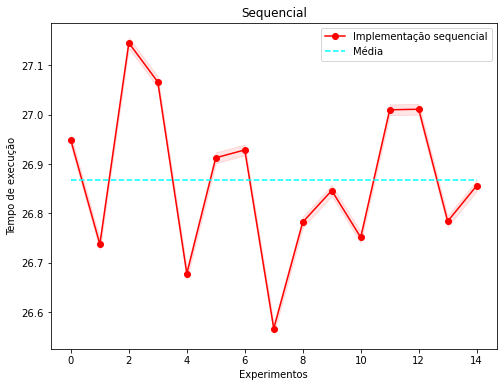

In [10]:
seq_mean = round(mean(data['seq'][1]), 3)

eixo_x = [x for x in range(15)]

plt.figure(figsize = (8,6))

plt.plot(eixo_x, data['seq'][1], color='r', marker='o', label='Implementação sequencial')
plt.plot(eixo_x, [seq_mean for x in range(15)], color='aqua', label='Média', linestyle='--')

# Intervalo de confiança
y = data['seq'][1]
ci = 1.96 * np.std(y)/np.mean(y)
plt.fill_between(eixo_x, (y-ci), (y+ci), color='r', alpha=.1)

plt.xlabel("Experimentos")
plt.ylabel("Tempo de execução")
plt.legend()
plt.title("Sequencial")
plt.show()

# print(seq_mean)
# print('Intervalo:', [ round(min(data['seq'][1]), 3), round(max(data['seq'][1]), 3) ])

## Pthreads

Arquivo de referência: ```mandelbrot_pth.c```

- Tempo médio de execução: 11.26s
- Número ótimo de threads: 32

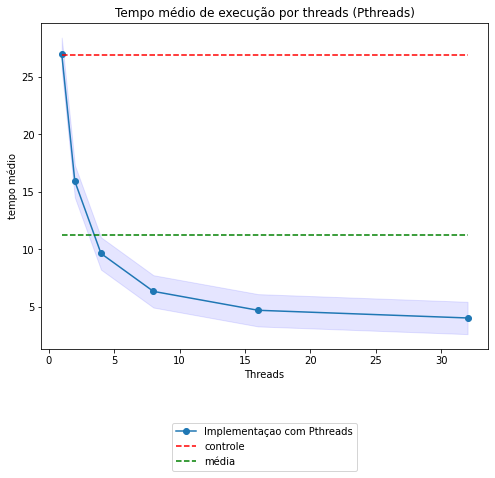

In [11]:
pth_mean = []
for t in threads:
  pth_mean.append(round(mean(data['pth'][t]), 3))


plt.close()

plt.figure(figsize = (8,6))

plt.plot(threads, pth_mean, marker='o', label='Implementaçao com Pthreads')
plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red', linestyle='--')
plt.plot(threads, [round(mean(pth_mean), 3)] * len(threads), label = 'média', color='green', linestyle='--')

# Intervalo de confiança
ci = 1.96 * np.std(pth_mean)/np.mean(pth_mean)
plt.fill_between(threads, (pth_mean-ci), (pth_mean+ci), color='b', alpha=.1)


plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (Pthreads)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.show()


## OpenMP

Arquivo de referência: ```mandelbrot_omp.c```

- Tempo médio de execução: 11.09s
- Número ótimo de threads: 32

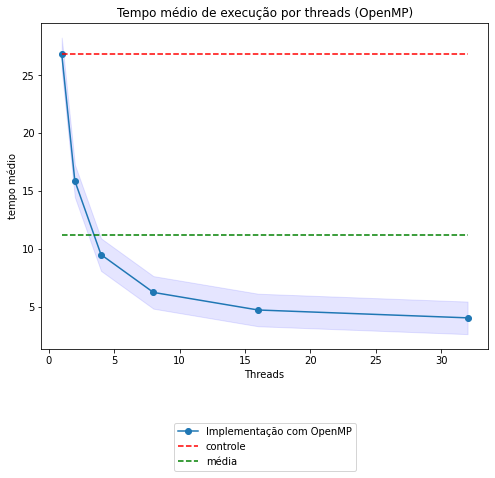

In [12]:
omp_mean = []
for t in threads:
  omp_mean.append(round(mean(data['omp'][t]), 3))

plt.close()

plt.figure(figsize = (8,6))

plt.plot(threads, omp_mean, label = 'Implementação com OpenMP', marker='o')
plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red', linestyle='--')
plt.plot(threads, [round(mean(omp_mean), 3)] * len(threads), label = 'média', color='green', linestyle='--')

# Intervalo de confiança
ci = 1.96 * np.std(omp_mean)/np.mean(omp_mean)
plt.fill_between(threads, (omp_mean-ci), (omp_mean+ci), color='b', alpha=.1)

plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (OpenMP)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.show()

## OpenMPI

Arquivo de referência: ```mandelbrot_mpi.c```

- Tempo médio de execução: 12.15s
- Número ótimo de processos: 16


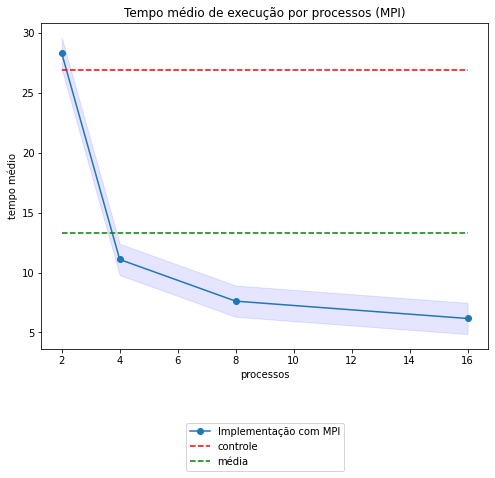

In [13]:

plt.close()

mpi_mean = []

for p in processos:
  mpi_mean.append(round(mean(data['mpi'][p]), 3))



plt.figure(figsize = (8,6))
plt.plot(processos, mpi_mean, label = 'Implementação com MPI', marker='o')
plt.plot(processos, [seq_mean] * len(processos), label = 'controle', color='red', linestyle='--')
plt.plot(processos, [round(mean(mpi_mean), 3)] * len(processos), label = 'média', color='green', linestyle='--')

# Intervalo de confiança
ci = 1.96 * np.std(mpi_mean)/np.mean(mpi_mean)
plt.fill_between(processos, (mpi_mean-ci), (mpi_mean+ci), color='b', alpha=.1)

plt.ylabel("tempo médio")
plt.xlabel("processos")
plt.title("Tempo médio de execução por processos (MPI)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3))
plt.show()


## OpenMPI + OpenMP

Arquivo de referência: ```mandelbrot_mpi_omp.c```

- Tempo médio de execução: 9.75s
- Número ótimo de processos: 16
- Número ótimo de threads: 32

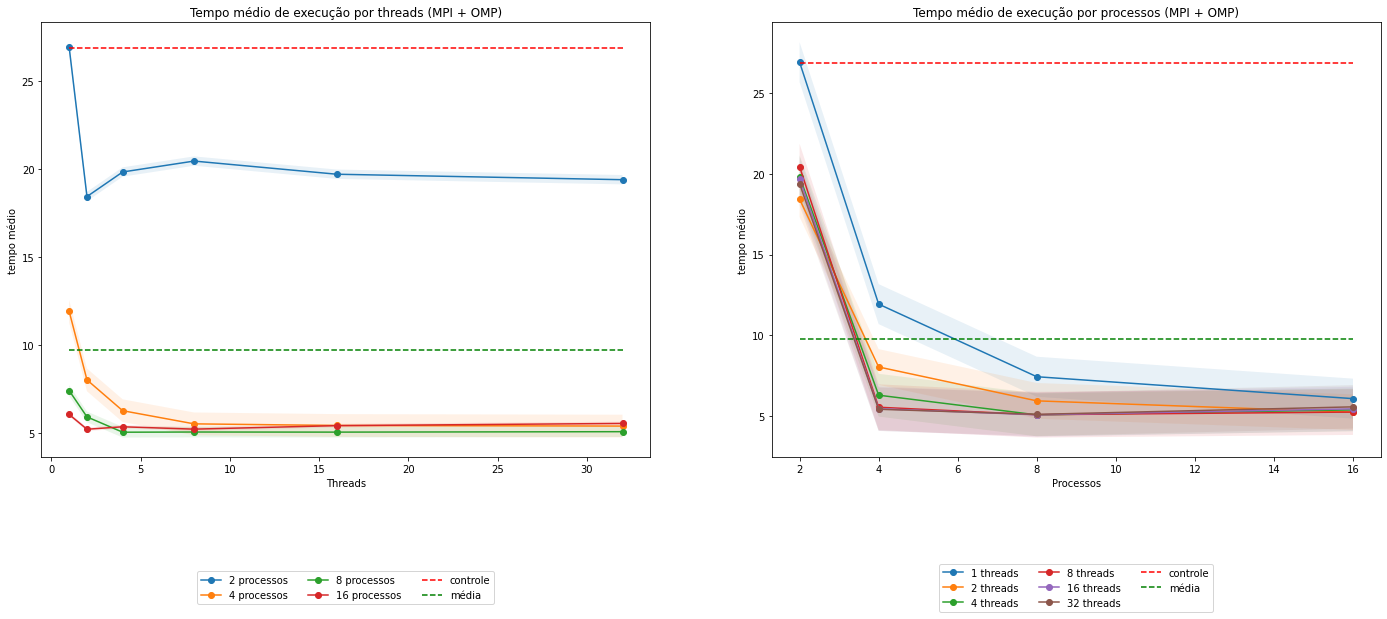

In [14]:
plt.close()

mpi_omp_mean = []

for p in processos:
  tmp = []
  for t in threads:
    tmp.append(round(mean(data['mpi_omp'][p][t]), 3))
  mpi_omp_mean.append(tmp)


plt.figure(figsize = (24,8))

plt.subplot(1,2,1)

for i in range(len(processos)):
  plt.plot(threads, mpi_omp_mean[i], label = f'{processos[i]} processos', marker='o')
  y=mpi_omp_mean[i]
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(threads, (y-ci), (y+ci), alpha=.1)

plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red', linestyle='--')
plt.plot(threads, [round(mean(mpi_omp_mean), 3)] * len(threads), label = 'média', color='green', linestyle='--')
plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (MPI + OMP)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.subplot(1,2,2)

for i in range(len(threads)):
  y=[mpi_omp_mean[j][i] for j in range(len(processos))] 
  plt.plot(processos, y, label = f'{threads[i]} threads', marker='o')
  
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(processos, (y-ci), (y+ci), alpha=.1)

plt.plot(processos, [seq_mean] * len(processos), label = 'controle', color='red', linestyle='--')
plt.plot(processos, [round(mean(mpi_omp_mean), 3)] * len(processos), label = 'média', color='green', linestyle='--')
plt.ylabel("tempo médio")
plt.xlabel("Processos")
plt.title("Tempo médio de execução por processos (MPI + OMP)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.show()

## OpenMPI + Pthreads

Arquivo de referência: ```mandelbrot_mpi_pth.c```

- Tempo médio de execução: 7.17s
- Número ótimo de processos: 16
- Número ótimo de threads: 16

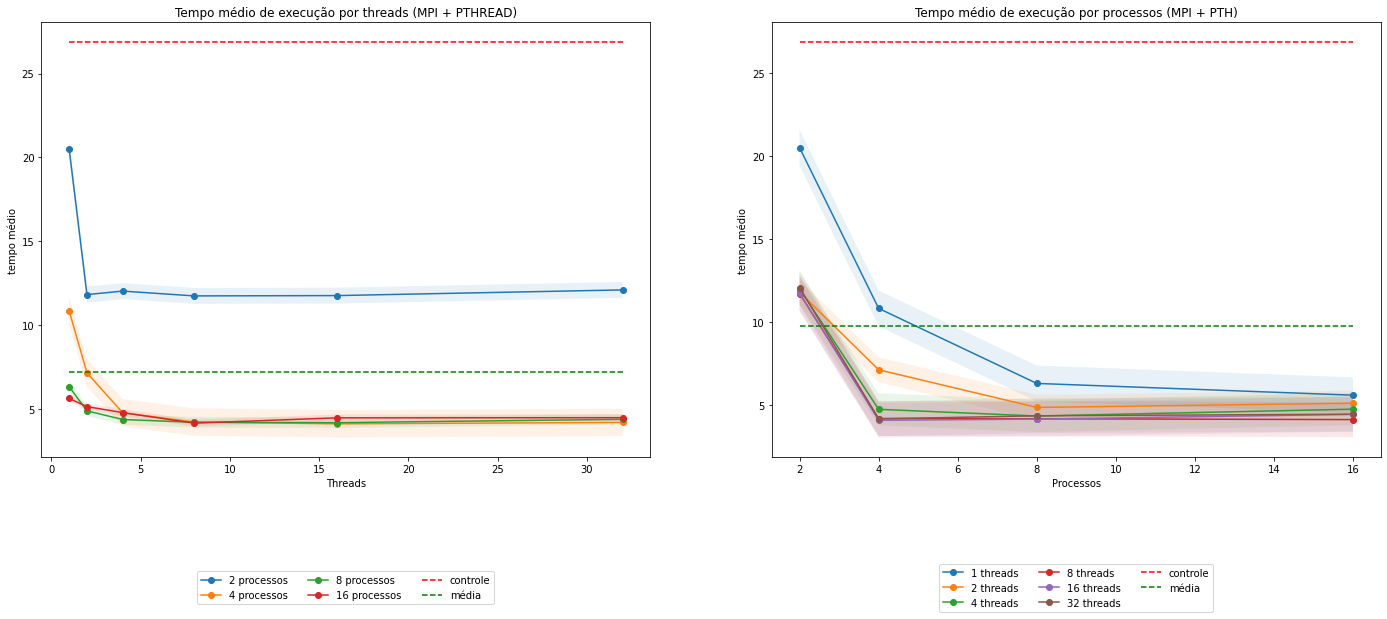

In [15]:
plt.close()

mpi_pth_mean = []

for p in processos:
  tmp = []
  for t in threads:
    tmp.append(round(mean(data['mpi_pth'][p][t]), 3))
  mpi_pth_mean.append(tmp)


plt.figure(figsize = (24,8))

plt.subplot(1,2,1)

for i in range(len(processos)):
  plt.plot(threads, mpi_pth_mean[i], label = f'{processos[i]} processos', marker='o')
  y=mpi_pth_mean[i]
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(threads, (y-ci), (y+ci), alpha=.1)

plt.plot(threads, [seq_mean] * len(threads), label = 'controle', color='red', linestyle='--')
plt.plot(threads, [round(mean(mpi_pth_mean), 3)] * len(threads), label = 'média', color='green', linestyle='--')
plt.ylabel("tempo médio")
plt.xlabel("Threads")
plt.title("Tempo médio de execução por threads (MPI + PTHREAD)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.subplot(1,2,2)

for i in range(len(threads)):
  y=[mpi_pth_mean[j][i] for j in range(len(processos))] 
  plt.plot(processos, y, label = f'{threads[i]} threads', marker='o')
  
  ci = 1.96 * np.std(y)/np.mean(y)
  plt.fill_between(processos, (y-ci), (y+ci), alpha=.1)

plt.plot(processos, [seq_mean] * len(processos), label = 'controle', color='red', linestyle='--')
plt.plot(processos, [round(mean(mpi_omp_mean), 3)] * len(processos), label = 'média', color='green', linestyle='--')
plt.ylabel("tempo médio")
plt.xlabel("Processos")
plt.title("Tempo médio de execução por processos (MPI + PTH)")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)



plt.show()

# Comparação entre as implementações

Fizemos dois tipos de comparação: utilizando o **resultado médio** obtido para cada implementação utilizando os parâmetros determinados (ótimos) e utilizando o **menor tempo de execução** obtido com esses parametros

### Implementações consideradas:
  - Sequencial
  - Pthreads
  - OMP
  - OMPI
  - OMPI + Pthreads
  - OMPI + OMP

### Número de processos e threads:
  - Processos: 2, 4, 8, 16
  - Threads:   1, 2, 4, 8, 16, 32

**Observações:**

O critério de avaliação dentre as implementações do Algoritmo de Mandelbrot é o menor tempo de execução. Contudo, deve-se levar em conta a exigência de recursos computacionais para se chegar a esses resultados.

Abaixo, encontram-se as análises de desempenho tendo em vista processos, número de threads e a combinação desses dois parâmetros.

## Avaliação baseada no caso com menor tempo de execução

Primeiro, comparamos as implementações utilizando o experimento com menor tempo de execução considerando os parâmetros ótimos, definidos anteriormente

### Avaliando o número de processos

In [16]:
melhor_processos = {
    'tempo': {
        'mpi': {},
        'mpi_omp': {},
        'mpi_pth': {}
    },
    'threads': {
        'mpi': {},
        'mpi_omp': {},
        'mpi_pth': {}
    }
}

aux = pd.read_csv('MPI-Triple_Spiral_Valley-4096.csv')

data_aux = {}

data_aux['mpi'] = {}

for p in processos:
  data_aux['mpi'][p] = {}
  for t in threads:
    tmp = aux[(aux.n_process == p)]
    tmp = tmp['time']
    data_aux['mpi'][p][t] = list(tmp.values)

#print(data_aux['mpi'])

for e in melhor_processos['tempo']:
  for p in processos:
    melhor_processos['tempo'][e][p] = 10000 #numero "infinito arbitrario"
    for t in threads:
      if(e == 'mpi'):
        tmp = min(data_aux['mpi'][p][t])
      else:
        tmp = min(data[e][p][t])
      if tmp < melhor_processos['tempo'][e][p]:
        melhor_processos['tempo'][e][p] = tmp 
        melhor_processos['threads'][e][p] = t

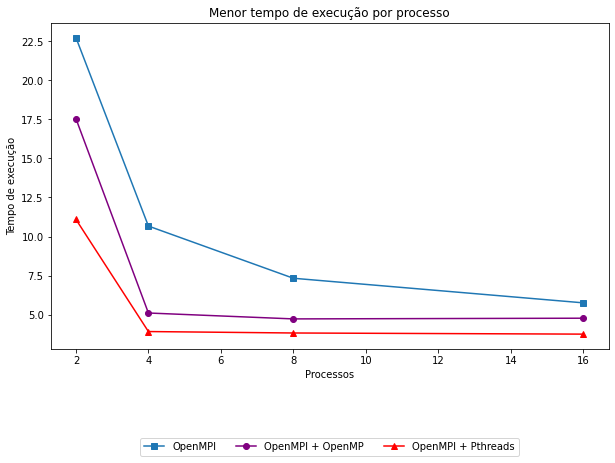

In [17]:
plt.close()

plt.figure(figsize=(10,6))

plt.plot(list(melhor_processos['tempo']['mpi'].keys()), list(melhor_processos['tempo']['mpi'].values()), label='OpenMPI', marker='s')
plt.plot(list(melhor_processos['tempo']['mpi_omp'].keys()), list(melhor_processos['tempo']['mpi_omp'].values()), label='OpenMPI + OpenMP', color='purple', marker='o')
plt.plot(list(melhor_processos['tempo']['mpi_pth'].keys()), list(melhor_processos['tempo']['mpi_pth'].values()), label='OpenMPI + Pthreads', color='r', marker='^')

plt.ylabel("Tempo de execução")
plt.xlabel("Processos")
plt.title("Menor tempo de execução por processo")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

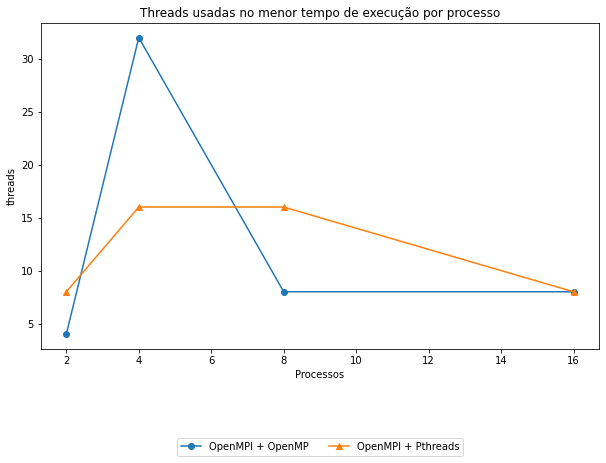

In [19]:
plt.close()

plt.figure(figsize=(10,6))

plt.plot(list(melhor_processos['threads']['mpi_omp'].keys()), list(melhor_processos['threads']['mpi_omp'].values()), label='OpenMPI + OpenMP', marker='o')
plt.plot(list(melhor_processos['threads']['mpi_pth'].keys()), list(melhor_processos['threads']['mpi_pth'].values()), label='OpenMPI + Pthreads', marker='^')

plt.ylabel("threads")
plt.xlabel("Processos")
plt.title("Threads usadas no menor tempo de execução por processo")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

### Avaliando o número de Threads

In [20]:
melhor_threads = {
    'tempo': {
        'mpi_omp': {},
        'mpi_pth': {}
    },
    'processos': {
        'mpi_omp': {},
        'mpi_pth': {}
    }
}

for e in melhor_threads['tempo']:
  for t in threads:
    melhor_threads['tempo'][e][t] = 10000 #numero "infinito arbitrario"
    for p in processos:
      tmp = min(data[e][p][t])
      if tmp < (melhor_threads['tempo'][e][t]):
        melhor_threads['tempo'][e][t] = tmp 
        melhor_threads['processos'][e][t] = p



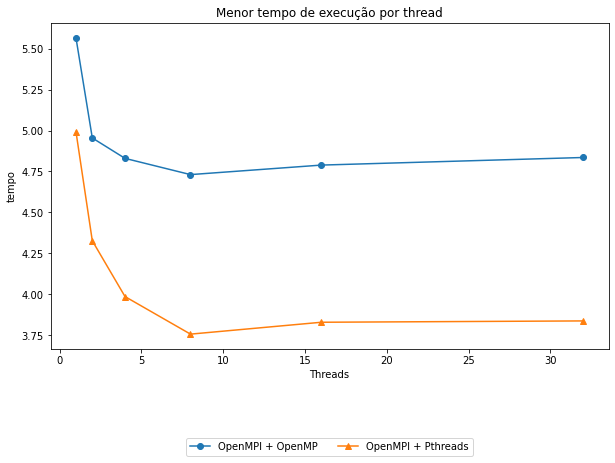

In [21]:
plt.close()

plt.figure(figsize=(10,6))

plt.plot(list(melhor_threads['tempo']['mpi_omp'].keys()), list(melhor_threads['tempo']['mpi_omp'].values()), label='OpenMPI + OpenMP', marker='o')
plt.plot(list(melhor_threads['tempo']['mpi_pth'].keys()), list(melhor_threads['tempo']['mpi_pth'].values()), label='OpenMPI + Pthreads', marker='^')

plt.ylabel("tempo")
plt.xlabel("Threads")
plt.title("Menor tempo de execução por thread")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

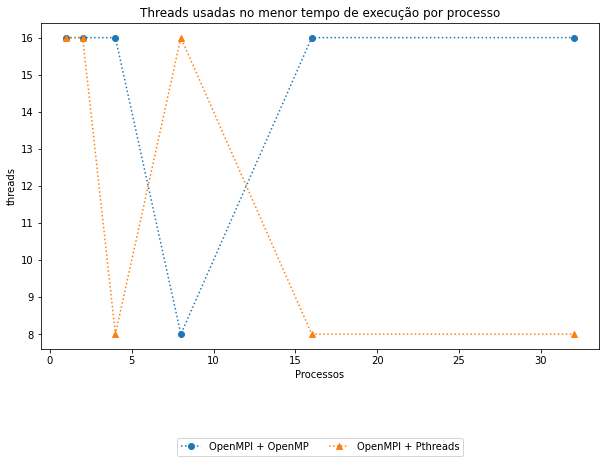

In [22]:
plt.close()

plt.figure(figsize=(10,6))

plt.plot(list(melhor_threads['processos']['mpi_omp'].keys()), list(melhor_threads['processos']['mpi_omp'].values()), label='OpenMPI + OpenMP', marker='o', linestyle=':')
plt.plot(list(melhor_threads['processos']['mpi_pth'].keys()), list(melhor_threads['processos']['mpi_pth'].values()), label='OpenMPI + Pthreads', marker='^', linestyle=':')

plt.ylabel("threads")
plt.xlabel("Processos")
plt.title("Threads usadas no menor tempo de execução por processo")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

### Avaliando processos e threads

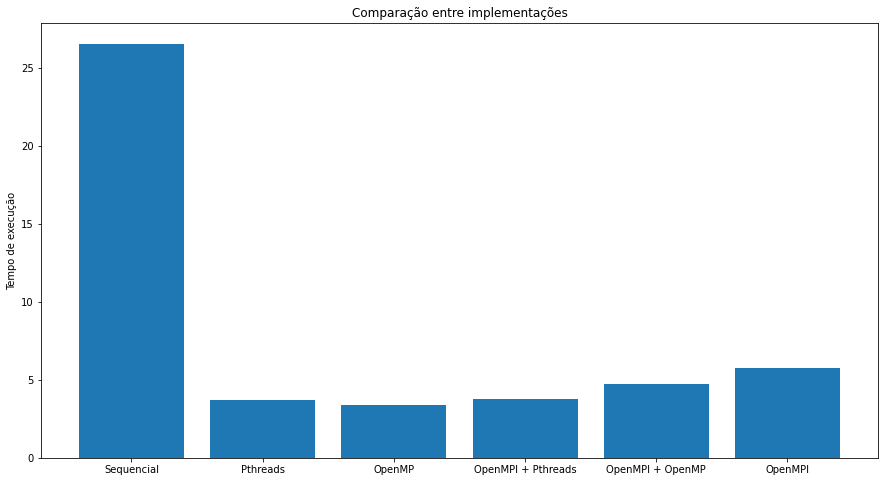

                    Menor tempo
Sequencial              26.5673
Pthreads                 3.7094
OpenMP                   3.4120
OpenMPI + Pthreads       3.7568
OpenMPI + OpenMP         4.7308
OpenMPI                  5.7586


In [23]:
melhor = {
    'Sequencial' : 1000, # infinito arbitrario
    'Pthreads' : 1000,
    'OpenMP' : 1000,
    'OpenMPI + Pthreads' : 1000,
    'OpenMPI + OpenMP' : 1000,
    'OpenMPI' : 1000
}

melhor['Sequencial'] = min(data['seq'][1])

for t in threads:
  tmp = min(data['pth'][t])
  if (tmp < melhor['Pthreads']):
    melhor['Pthreads'] = tmp

for t in threads:
  tmp = min(data['omp'][t])
  if (tmp < melhor['OpenMP']):
    melhor['OpenMP'] = tmp

for p in processos:
  for t in threads:
    tmp = min(data['mpi_pth'][p][t])
    if (tmp < melhor['OpenMPI + Pthreads']):
      melhor['OpenMPI + Pthreads'] = tmp
      
for p in processos:
  for t in threads:
    tmp = min(data['mpi_omp'][p][t])
    if (tmp < melhor['OpenMPI + OpenMP']):
      melhor['OpenMPI + OpenMP'] = tmp

for p in processos:
  #for t in threads:
  tmp = min(data['mpi'][p])
  if (tmp < melhor['OpenMPI']):
    melhor['OpenMPI'] = tmp

plt.figure(figsize=(15,8))
plt.bar(melhor.keys(), melhor.values())
plt.title("Comparação entre implementações")
plt.ylabel("Tempo de execução")
plt.show()

print(pd.DataFrame.from_dict(melhor, orient='index', columns=['Menor tempo']))

## Avaliação baseada no valor médio da execução com os parâmetros determinados

Comparamos as implementações com os parâmetros determinados anteriormente, então temos:



#### Parâmetros:

| Implementação | Nº de threads | Nº de Processos |
|-----|------|------|
|**Sequencial** | - | - |
|**Pthreads** | 32 | - |
|**OMP** | 32 | - |
|**OMPI** | - | 16 |
|**OMPI + Pthreads** | 16 | 16 |
|**OMPI + OMP** | 32 | 16 |




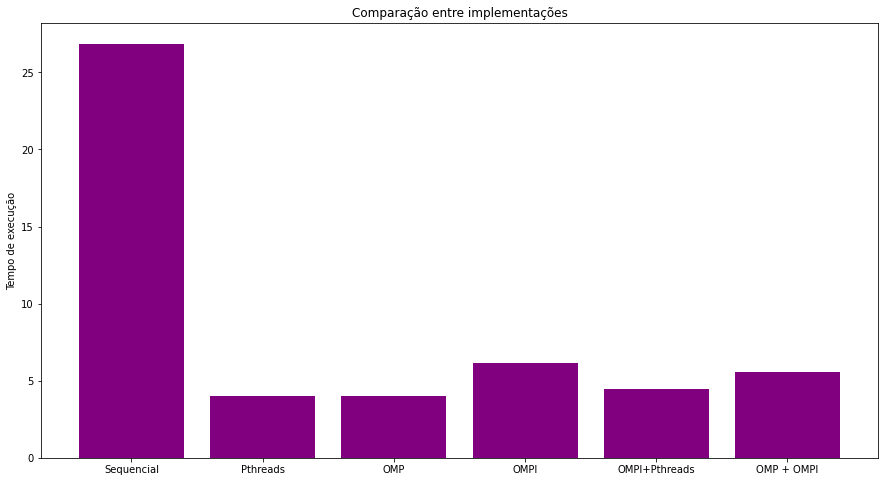

In [24]:
melhores_mean = []
implementations = ["Sequencial", "Pthreads", "OMP", "OMPI", "OMPI+Pthreads", "OMP + OMPI"]
melhores_mean.append(seq_mean)
melhores_mean.append(mean(data['pth'][32]))
melhores_mean.append(mean(data['omp'][32]))
melhores_mean.append(mean(data['mpi'][16][:15]))
melhores_mean.append(mean(data['mpi_pth'][16][16]))
melhores_mean.append(mean(data['mpi_omp'][16][32]))

plt.figure(figsize=(15,8))
plt.bar(implementations, melhores_mean, color='purple')

plt.title("Comparação entre implementações")
plt.ylabel("Tempo de execução")

plt.show()

# Análise de resultados

A partir dos gráficos gerados, podemos observar que o desempenho dos programas implementados torna-se constante a partir de certo momento, com exceção do caso sequencial. Entre todos os testes realizados, o gráfico acima aponta que o menor tempo adquirido foi gerado pelo programa com OpenMP puro, contudo, isso só acontece com 32 threads. Comparativamente, os resutados encontrados para as implementações com MPI chegam a médias próximas muito mais rápido.

O desempenho dos programas com OpenMPI apresentam a melhor implementação como a de MPI + Pthreads. É também possível observar pelos gráficos acima (principalmente, pelo gráfico que indica 'Threads usadas no menor tempo de execução por processo') que o programa MPI+OpenMP exige mais threads por processo do que a implementação MPI+Pthreads na maioria dos casos.

Tendo em vista esses fatores, pode-se concluir que o programa de melhor desempenho é o da combinação de MPI+Pthreads.